## What’s the earning potential for data roles and skills?

#### Methodology

• Analyze median salaries for the top 6 data job roles

• Calculate median salary by skill for Data Analyst positions

• Visualize top-paying and most in-demand skills in data jobs


### Importing Libraries and Cleaning-up Data

In [1]:
#Importing Libraries
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
import ast
import seaborn as sns

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
#Drop NA salary indexes and people besides the US
df_US = df[df['job_country']=='United States'].dropna(subset='salary_year_avg')

In [25]:
#Top 6 the most posted jobs
job_title = df_US['job_title_short'].value_counts().head(6).index.tolist()
df_plot = df_US[df_US['job_title_short'].isin(job_title)]

#Ordering
plot_order = df_plot.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index.tolist()

### Customizing and plotting Chart

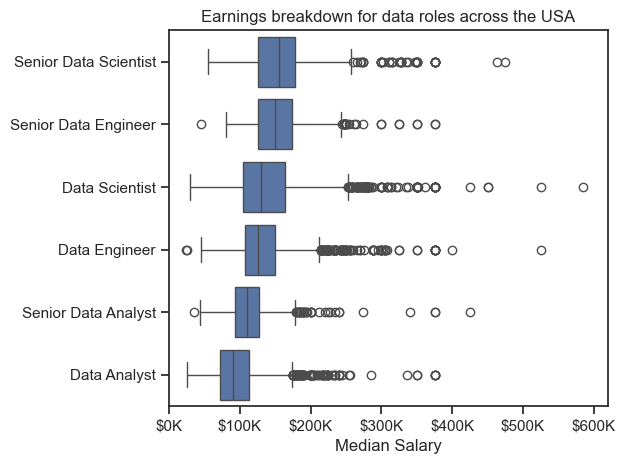

In [33]:
sns.set_theme(style='ticks')
sns.boxplot(data=df_plot, x='salary_year_avg', y='job_title_short', order=plot_order)

plt.ylabel('')
plt.xlabel('Median Salary')
plt.xlim(0, 620000)
plt.title('Earnings breakdown for data roles across the USA')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

### Analysis median salary for the most paid and the most required skills for Data Analysts

I left only Data Analysts from US, then I dropped indexes with no specified year salary and finally separated each skill one by one. Next I grouped it in a table with a count for each skill and it's median salary.

In [ ]:
#Filtering US Data Analysts' skills with salary indicated
df_DA = df[(df['job_country']=='United States')&(df['job_title_short']=='Data Analyst')].dropna(subset='salary_year_avg').explode('job_skills')

df_skills = df_DA.groupby('job_skills')['salary_year_avg'].agg(['median', 'count'])
df_skills

,median,count
job_skills,,
airflow,116250.00,44
airtable,90000.00,5
alteryx,106281.25,106
angular,107500.00,8
ansible,159640.00,1
...,...,...
wire,74250.00,4
word,81194.75,461
workfront,75000.00,3


### Plotting Bar Chart

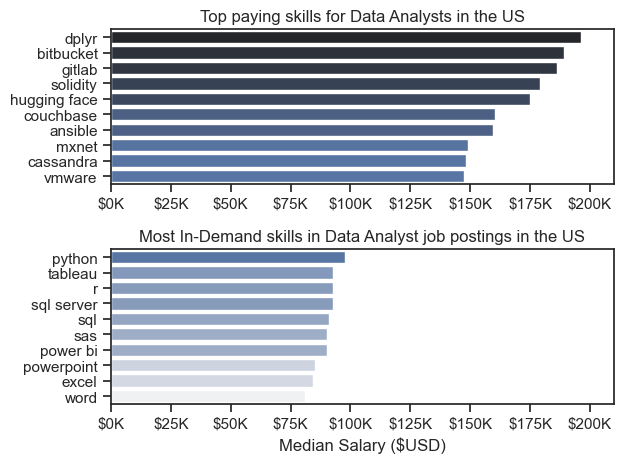

In [77]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')
#Top paying skills for Data Analysts in the US
sns.barplot(data=df_skills.sort_values(by='median', ascending=False).head(10), x='median', y='job_skills', ax=ax[0], hue='median', palette='dark:b_r')
#Most In-Demand skills in Data Analyst job postings in the US
sns.barplot(data=df_skills.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False), x='median', y='job_skills', ax=ax[1], hue='median', palette='light:b')

#Customizing Chart
for i in range(2):
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 210000)
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
    
ax[1].set_xlabel('Median Salary ($USD)')
ax[0].set_title('Top paying skills for Data Analysts in the US')
ax[1].set_title('Most In-Demand skills in Data Analyst job postings in the US')


fig.tight_layout()
plt.show()